In [ ]:
#Description: This program uses an artificial recurrent neaural network called Long Short Term Memory(LSTM)
#             to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [2]:
#Import Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [41]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Show the Data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.899139
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.069626
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.981300


In [14]:
#Get the number of rows and columns in the data set
df.shape

(2003, 6)

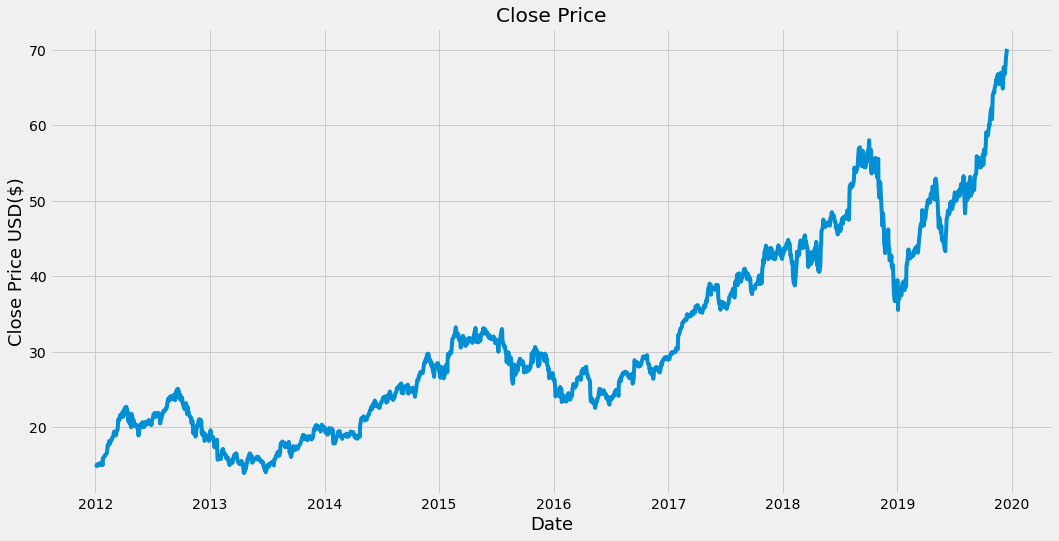

In [42]:
#Visualize the closing price 
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.show()

In [16]:
#Create a new Data Frame with only Close Column
data=df.filter(['Close'])
#Convert the data frame to a NumPy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)

training_data_len

1603

In [17]:
#Scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)#It computes the minimum and maximum values to compute the data to transform the data
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [20]:
#Create the training data set
#Create the scaled training data set
train_data=scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01

In [21]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train), np.array(y_train)

In [23]:
#Reshape the data 
#We need to reshape the data because a LSTM model expects the data to be in 3-Dimensions
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1], 1))
x_train.shape


(1543, 60, 1)

In [26]:
#Build the LSTM model
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [28]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [29]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


1543/1543 [==============================] - 40s 24ms/step - loss: 0.0030


In [31]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2003
test_data=scaled_data[training_data_len-60: , :]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i, 0])



In [32]:
#Convert the data into a numpy array
x_test=np.array(x_test)

In [33]:
#Reshape the data(to make it 3-Dimensional expected by LSTM)
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1)) #Number of rows, number of rows, the closing price

In [34]:
#Get the model predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)#Unscaling the values


In [35]:
#Evaluating the midel by getting the Root Mean Squared Error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.5724482345581055

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


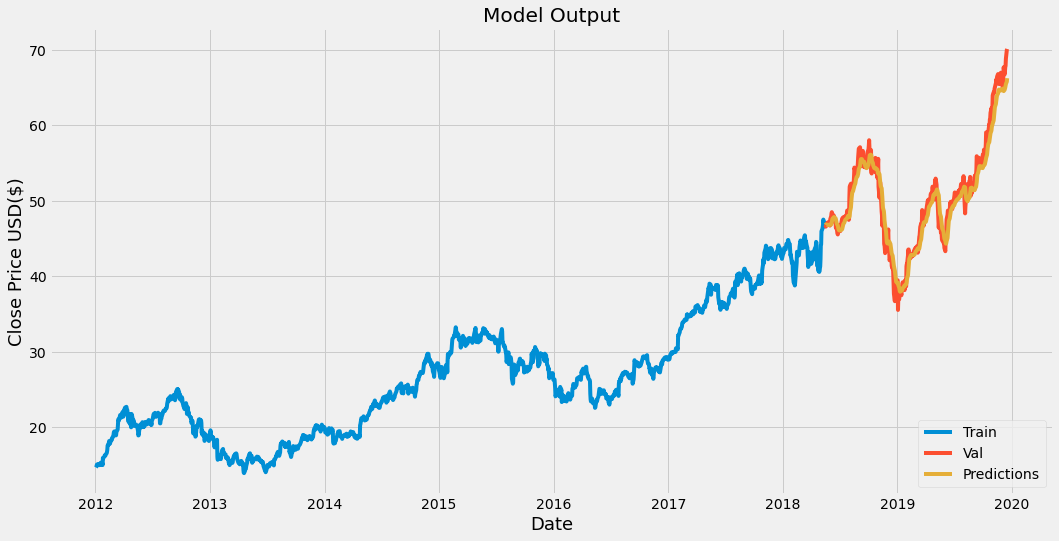

In [43]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model Output')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the actual and predicted price
valid

In [39]:
#Predicting price of 2021-05-19
#Get the Quote
apple_quote=web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-05-19')
#Create a new data frame
new_df=apple_quote.filter(['Close'])
#Get the last 60 days close price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#Create and empty list
X_test=[]
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpt array
X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get the predicted scaled price
pred_price=model.predict(X_test)
#Undo the Scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)

[[112.35128]]


In [40]:
#Get the quote
apple_quote2=web.DataReader('AAPL', data_source='yahoo', start='2021-05-19', end='2021-05-19')
print(apple_quote2['Close'])

Date
2021-05-19    124.690002
Name: Close, dtype: float64
